In [2]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print(f"X_train.shape {X_train.shape}")

X_train.shape (60000, 28, 28)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
r= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2956 - accuracy: 0.9144 - val_loss: 0.1390 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1438 - accuracy: 0.9575 - val_loss: 0.0973 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1079 - accuracy: 0.9674 - val_loss: 0.0870 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9726 - val_loss: 0.0785 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9763 - val_loss: 0.0723 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0585 - accuracy: 0.9809 - val_loss: 0.0744 - val_accuracy:

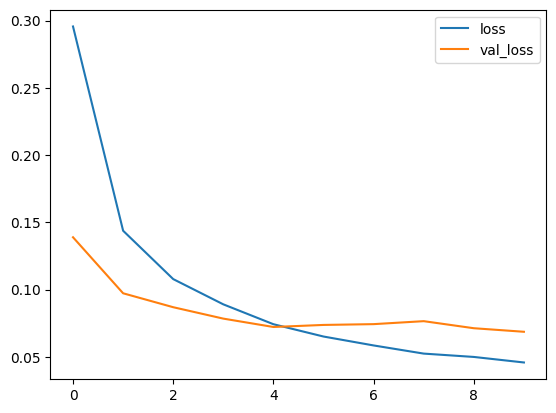

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

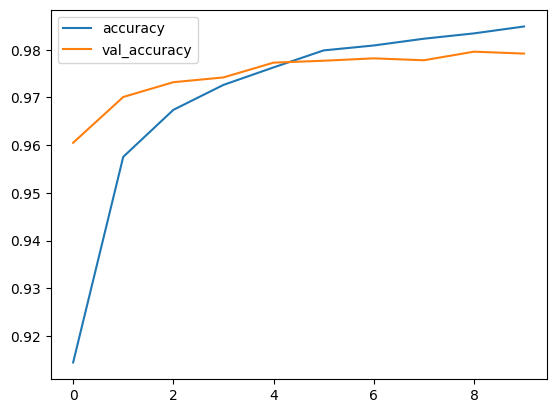

In [11]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [12]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 5ms/step - loss: 0.0687 - accuracy: 0.9792
[0.06870868802070618, 0.979200005531311]


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 968    1    2    0    1    1    4    1    2    0]
 [   0 1122    3    1    0    0    1    0    8    0]
 [   1    1 1010    2    2    0    3    6    6    1]
 [   0    0    7  989    0    7    0    3    2    2]
 [   1    0    2    0  960    0    6    2    2    9]
 [   2    0    0    8    0  874    5    1    1    1]
 [   4    3    0    1    3    5  939    1    2    0]
 [   2    4   12    1    0    0    0 1004    0    5]
 [   2    0    3    5    4    2    1    5  950    2]
 [   1    2    0    9   12    3    0    5    1  976]]


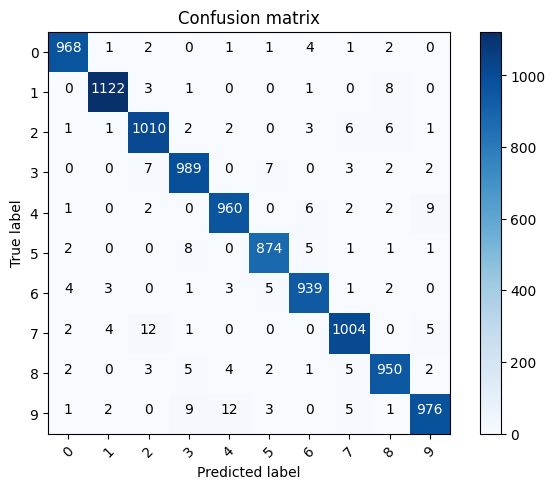

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

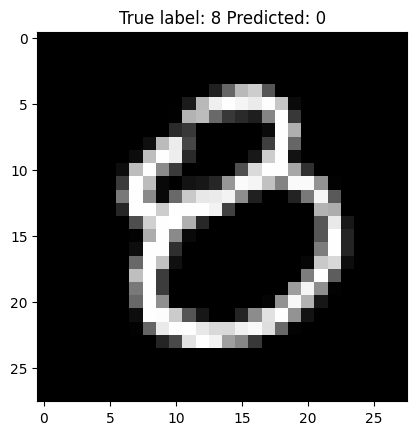

In [16]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));